<a href="https://colab.research.google.com/github/MarioBolanos/Metodo-de-Euler/blob/master/Eulers_method___implementation__done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

# Simple implementation of Euler's method

## Modules – Basics
<section class="post-meta">
By Niels Henrik Aase, Thorvald Ballestad, Eilif Sommer Øyre and Jon Andreas Støvneng
</section>
Last edited: November 5th 2019

___
This notebook serves as a very simple demonstration of Euler's method, the simplest numerical method to solve a first order differential equation. Our sole focus will be on the __implementation__, as we will only provide the most essential theory. For a more thorough notebook on Euler's method, check out our other notebook on *[Euler's method](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/eulers_method.ipynb)*.
___

## Introduction

In all kinds of natural sciences, we encounter differential equations. These equations can be quite complicated to solve analytically, and most times there does not exist an analytical solution. Nonetheless, we still need solve these kinds of equations in order for them to better our understanding of whichever underlying physical system we are working with.

For many students, understanding how to solve ordinary differential equations, ODEs for short, can be a time consuming and frustrating process. The purpose of this notebook is to simply demonstrate __how__ an ODE can be solved. Will not focus on the theory behind Euler's method, we will solely focus on the __implementation__ of our ODE solver. Ideally, the reader should also understand the theory and possible pitfalls of using Euler's method, thus we strongly recommend also reading our other module on *[Euler's method](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/eulers_method.ipynb)* (Note: This module will be updated shortly after the publication of this notebook). 

From a programming perspective, the level of this notebook is quite basic, but being familiar with basic Python and to a lesser extent the NumPy library is expected of the reader. For more information on the latter, check out our *[beginner-friendly notebook on numpy](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/introduction_to_numpy.ipynb)*.

Lastly, we would like to explain the choice of what kind of physical system we are going to solve. The most crude models for modeling bacterial growth is an excellent choice for demonstrating Euler's method, as the differential equation governing this growth is quite simple.

## Theory

### Population growth
Before we start programming, we will give a short introduction to bacterial growth. Bacteria reproduce by binary fission [[1]](#rsc). This is a process where a single bacterial cell splits in two, creating two bacterial cells. The two new bacterial cells, can again split into two, thus creating four bacterial cells. In reality, a single bacterial cell can only split in two a certain amount of times, but in our project we model our growth rate as if this was not the case.

We can then write our differential equation as

\begin{equation}
\frac{dy}{dt} = ky(t),
\label{ODE}
\end{equation}

where $y(t)$ is the population $y$ at time $t$, and $k$ is some constant of proportionality. If we use days as time unit, and assume that the population size at $ t= 1$ is double the population size at the $t=0$

\begin{equation}
y(1) = 2y(0)
\label{Initial},
\end{equation}

we can solve the differential equation analytically. Combining equations \eqref{ODE} and \eqref{Initial}, we get

\begin{equation}
y(t) = \mathrm{e}^{kt} = \mathrm{e}^{\mathrm{ln}(2)t} = 2^{t}. 
\label{Ana_sol}
\end{equation}

Equation \eqref{Ana_sol} fully describes the population size at time $t$.

### Euler's method
This paragraph will try to convey the bare minimum of theory regarding Euler's method. Again, we strongly recommend reading our full module on *[Euler's method](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/eulers_method.ipynb)*, as some of the concepts might not be presented at adequate depth. However, these paragraphs should be sufficient for the implementation.

First of all, when solving differential equations numerically, we need to __discretize__ our time variable $t$. $t$ is no longer a continuous variable, instead we write

$$
t_n = t_0 + nh, \quad \mathrm{with} \quad n = 0, 1, 2,..., N,
$$

where $t_0$ is the time value where we know our initial population size, and $h$ is the size between adjacent discrete time values. The relation between $N$ and $h$ is given by

$$
h = \frac{t_N - t_0}{N},
$$

where $N$ is the number of discrete time points we have in our simulation, while $t_N$ and denote the largest time value we have in our simulation.

In general, our numerical approximation will be better if we choose a small $h$. Note as the size of $h$ decreases, the number of discrete time values between $t_0$ and $t_N$ increases. We pay for the increased level precision by increasing the number of calculations needed, thus increasing the runtime of our program.

A first order differential equation with no explicit time dependence can be written on the the most general form

\begin{equation}
\frac{dy}{dt} = g(y),
\label{gen_Euler}
\end{equation}

where $g(y)$ is the equation governing the rate of change of our function $y(t)$. In our case, $g(y) = ky$.

If we know the population size at $t_0$ and denote this value as $y_0$, we can use Euler's method to find an approximation of the population size at $t_1 = t_0 +h$. The population size at $t_1$ is denoted as $y_1$. This approximation can be calculated by the formula

$$
y_1 = y_0 + hg(y_0).
$$

Now, to find the population size $y_2$ at $t_2 = t_1 + h = t_0 + 2h$, we use the same formula, but with $y_1$ instead of $y_0$

$$
y_2 = y_1 + h g(y_1).
$$

The most general form of Euler's method is written as

$$
y_{n+1} = y_n + h g(y_n),
\label{Euler}
$$
where we have the initial condition that

$$
y(t_0) = y_0.
$$

Now we can implement Euler's method in Python, and compare our numerical results to the analytical solution given in equation \eqref{Ana_sol}.

## Implementation

In [0]:
# Importing the necessary libraries
import numpy as np # NumPy is used to generate arrays and tp perform some mathematical operations
import matplotlib.pyplot as plt # Used for plotting results

# Updating figure params
# Note, this is not important for any of the code, this is just to set the appropiate figure and text sizes
newparams = {'figure.figsize': (15, 7), 'axes.grid': False,
             'lines.markersize': 10, 'lines.linewidth': 2,
             'font.size': 15, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral', 'figure.dpi': 200}
plt.rcParams.update(newparams)

In [0]:
def step_Euler(y, h, f):
    """This Python function performs a single step of Euler's method.
    
    Parameters:
            y: Numerical approximation of y at time t
            h: Step size
            f: RHS of our ODE (RHS = Right hand side). Can be any function that only has y as a variable.
        Returns:
            next_y: Numerical approximation of y at time t+h
    """
    next_y = y + h * f(y)
    return next_y


def full_Euler(h, f, y_0 = 1, start_t = 0, end_t = 1):
    """  A full numerical aproximation of an ODE in a set time interval. Performs consecutive Euler steps
    with step size h from start time until the end time. Also takes into account the initial values of the ODE
    
    Parameters:
            h: Step size
            f: RHS of our ODE
            y_0 : Initial condition for y at t = start_t
            start_t : The time at the initial condtion, t_0
            end_t : The end of the interval where the Euler method is perfomed, t_N
        Returns:
            y_list: Numerical approximation of y at times t_list
            t_list: Evenly spaced discrete list of time with spacing h. 
                    Starting time = start_t, and end time = end_t 
    """
    # Number of discretisation steps
    N = int((end_t - start_t) / h)
    # Following the notation in the theory, we have N+1 discrete time values linearly spaced
    t_list = np.linspace(start_t, end_t, N + 1)
    
    # Initialise array to store y-values
    y_list = np.zeros(N + 1)
    # Assign initial condition to first element
    y_list[0] = y_0
    
    # Assign the rest of the array using N Euler_steps
    for i in range(0, N):
        y_list[i + 1] = step_Euler(y_list[i], h, f)
    # With N + 1 time values, we are only able to calculate N values of y. Thus we do not return the last element of
    # our time list. We accomplish this by writing t_list[:-1]
    return y_list, t_list 

Now that we have our functions defined, we can simulate the bacterial population. We only need to define our RHS (Right hand side) of our differential equation, which we in the theory part denoted as $g(y)$.

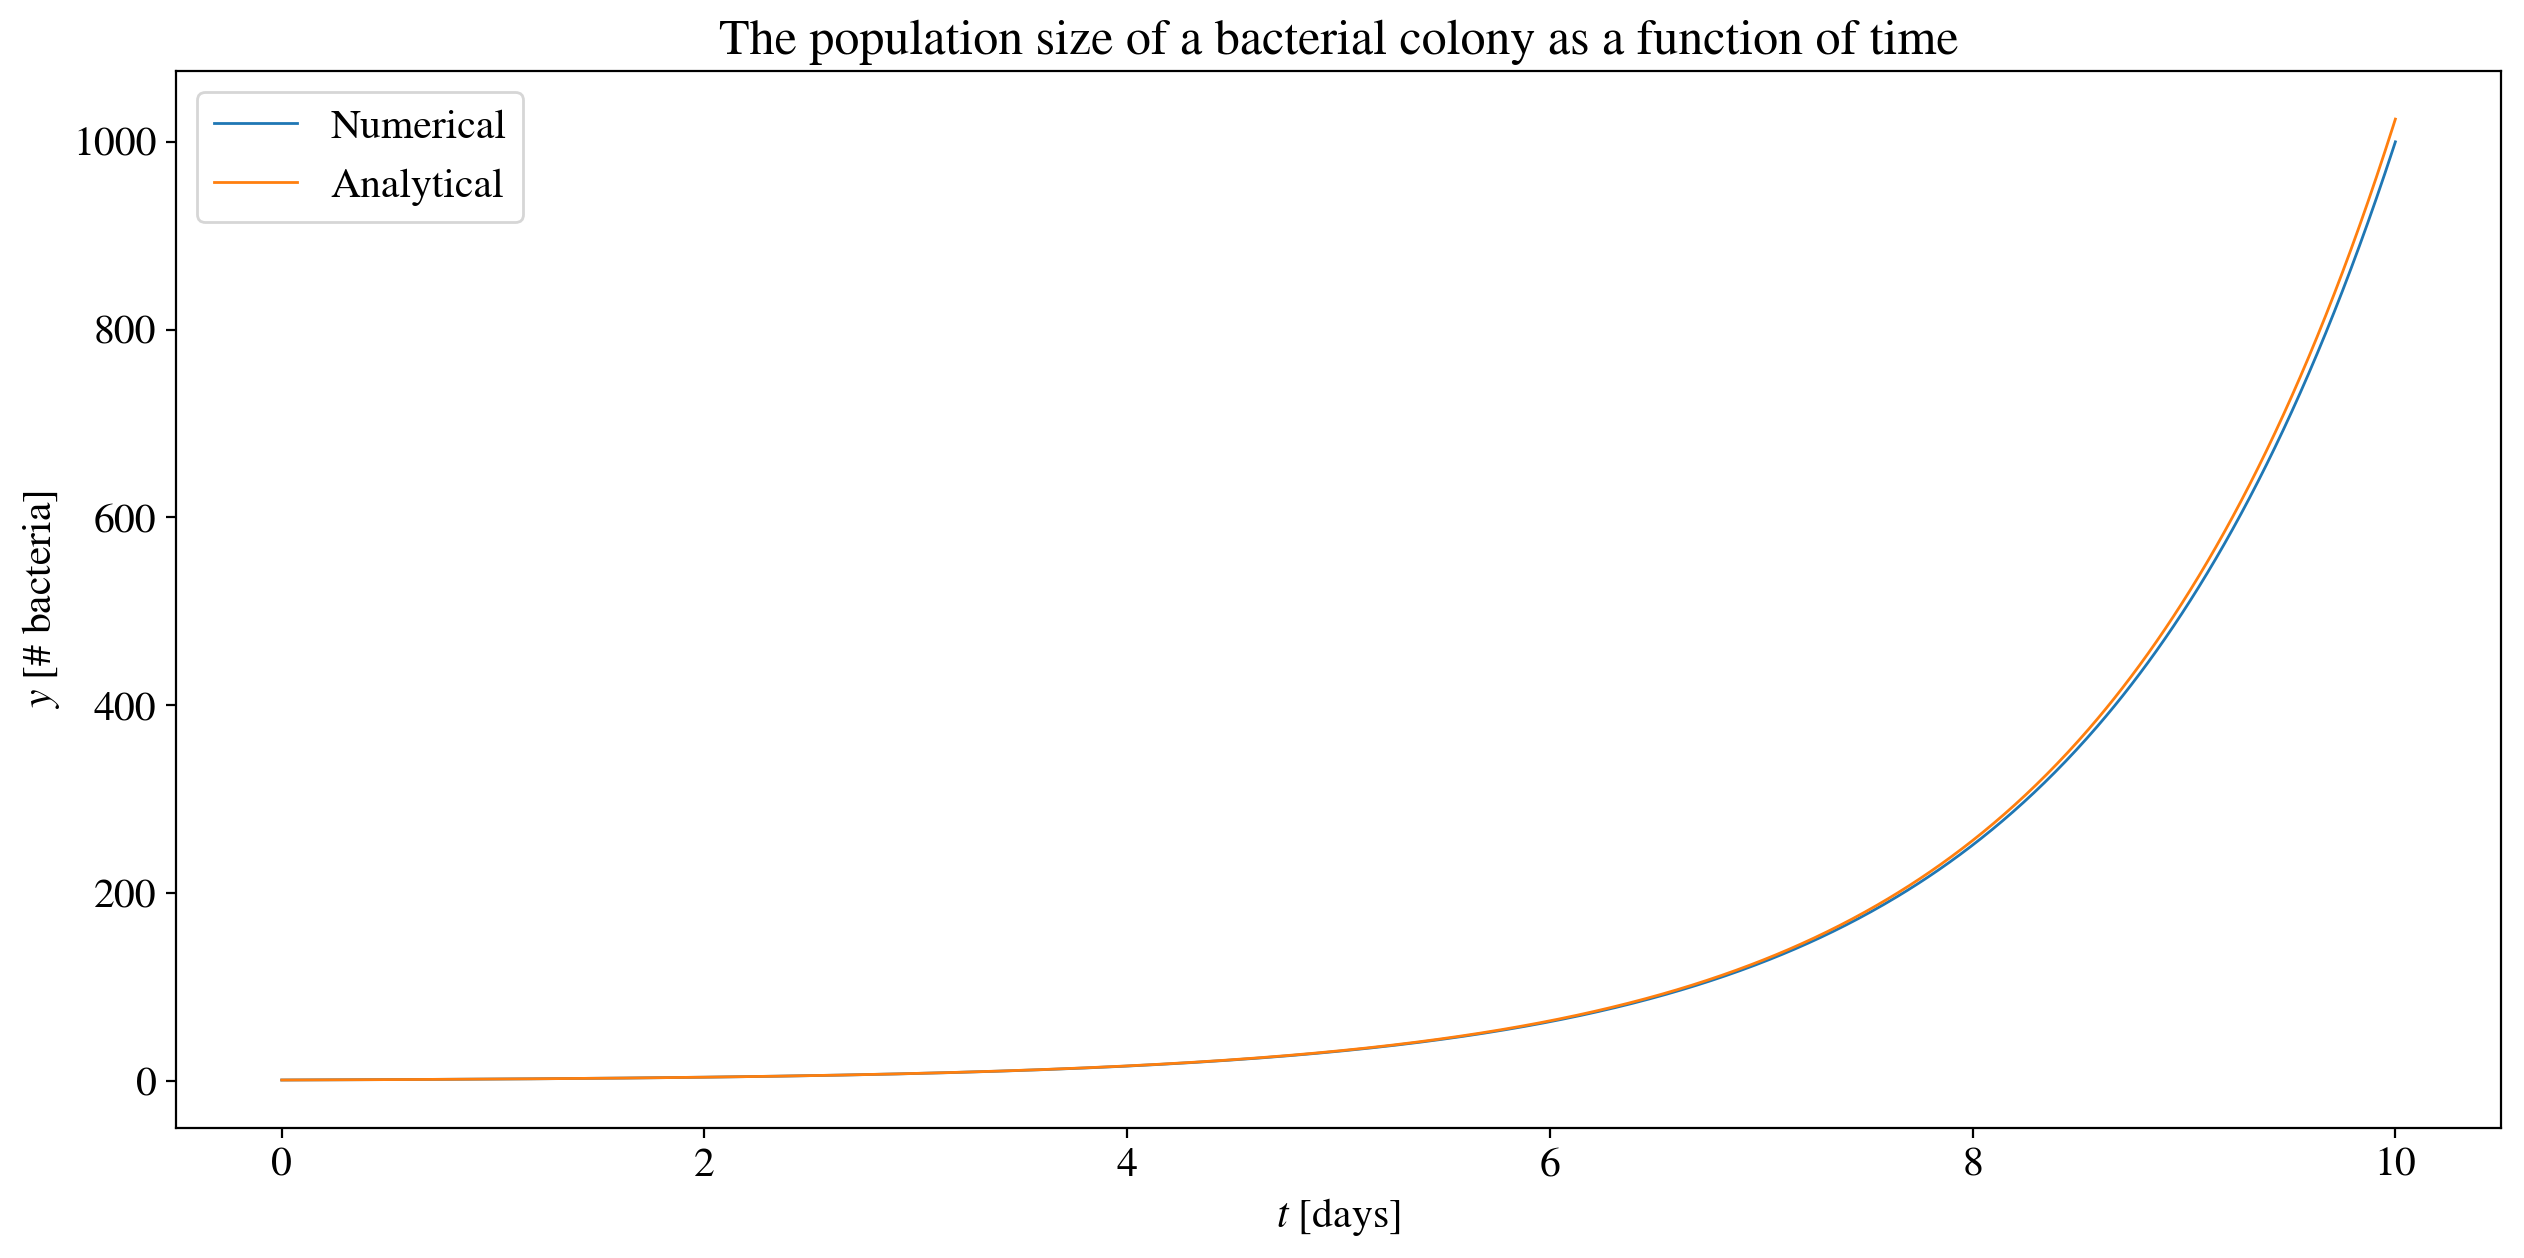

After 10 days, our numerical approximation of bacterias is off by: 24.20


In [0]:
def g(y):
    """Defines the right hand side of our differential equation. In our case of bacterial growth, g(y) = k*y
    
    Parameters:
            y: Numerical approximation of y at time t
        Returns:
            growth_rate: Current population size multiplied with a constant of proportionality. In this case this is 
            equal to ln(2)
    """
    growth_rate = np.log(2)*y
    return growth_rate

# Now we can find the the numerical results from Euler's method and compare them to the analytical solution

# Input parameters
y_0 = 1  # Initial population size, i.e. a single bacteria
h = 0.01 # Step size
t_0 = 0  # We define the time at our initial observation as 0
t_N = 10 # 10 days after our initial observation of a single bacteria


# Calculating results from Euler and plotting them
y_list, t_list = full_Euler(h, g, y_0, t_0, t_N)
plt.plot(t_list, y_list, label="Numerical", linewidth=1)

# Plotting the analytical solution derived earlier
plt.plot(t_list,np.power(2, t_list), label="Analytical", linewidth=1)

# Making the plot look nice
plt.legend()
plt.title("The population size of a bacterial colony as a function of time")
plt.xlabel(r'$t$ [days]')
plt.ylabel(r'$y$ [# bacteria]')
plt.show()

# Let's see how far off our numerical approximation is after 5 days.

last_analytical = np.power(2,t_list[-1]) # Extracting the last element of the analytical solution
last_numerical = y_list[-1] # Extracting the last element of the numerical solution

print("After 10 days, our numerical approximation of bacterias is off by: %.2f" %(last_analytical - last_numerical))

We see that our model fares quite well with a step size $h=0.0
1$, as it only deviates from the analytical solution by 24 bacteria cells, or 2.4 %. By choosing a smaller $h$, we could increase the precision of our result. For instance, choosing $h=0.001$, we would only get a deviation of 2.4 bacteria cells, or 0.24 %.

The reader might wonder why we would want to use Euler's method in this case, as we have a perfectly fine analytical solution. This differential equation has an analytical solution, however, this is not always the case. We only chose this example because can compare our numerical results to the correct answer, and thus validate our procedure. Changing our initial equation for the growth, equation \eqref{ODE}, to something called the logistic growth model on the form

\begin{equation}
\frac{dy}{dt} = ky(1 - \frac{y}{m}),
\label{logistic}
\end{equation}

where $m$ is a constant, we cannot solve this equation analytically. However, we can still use Euler's method!

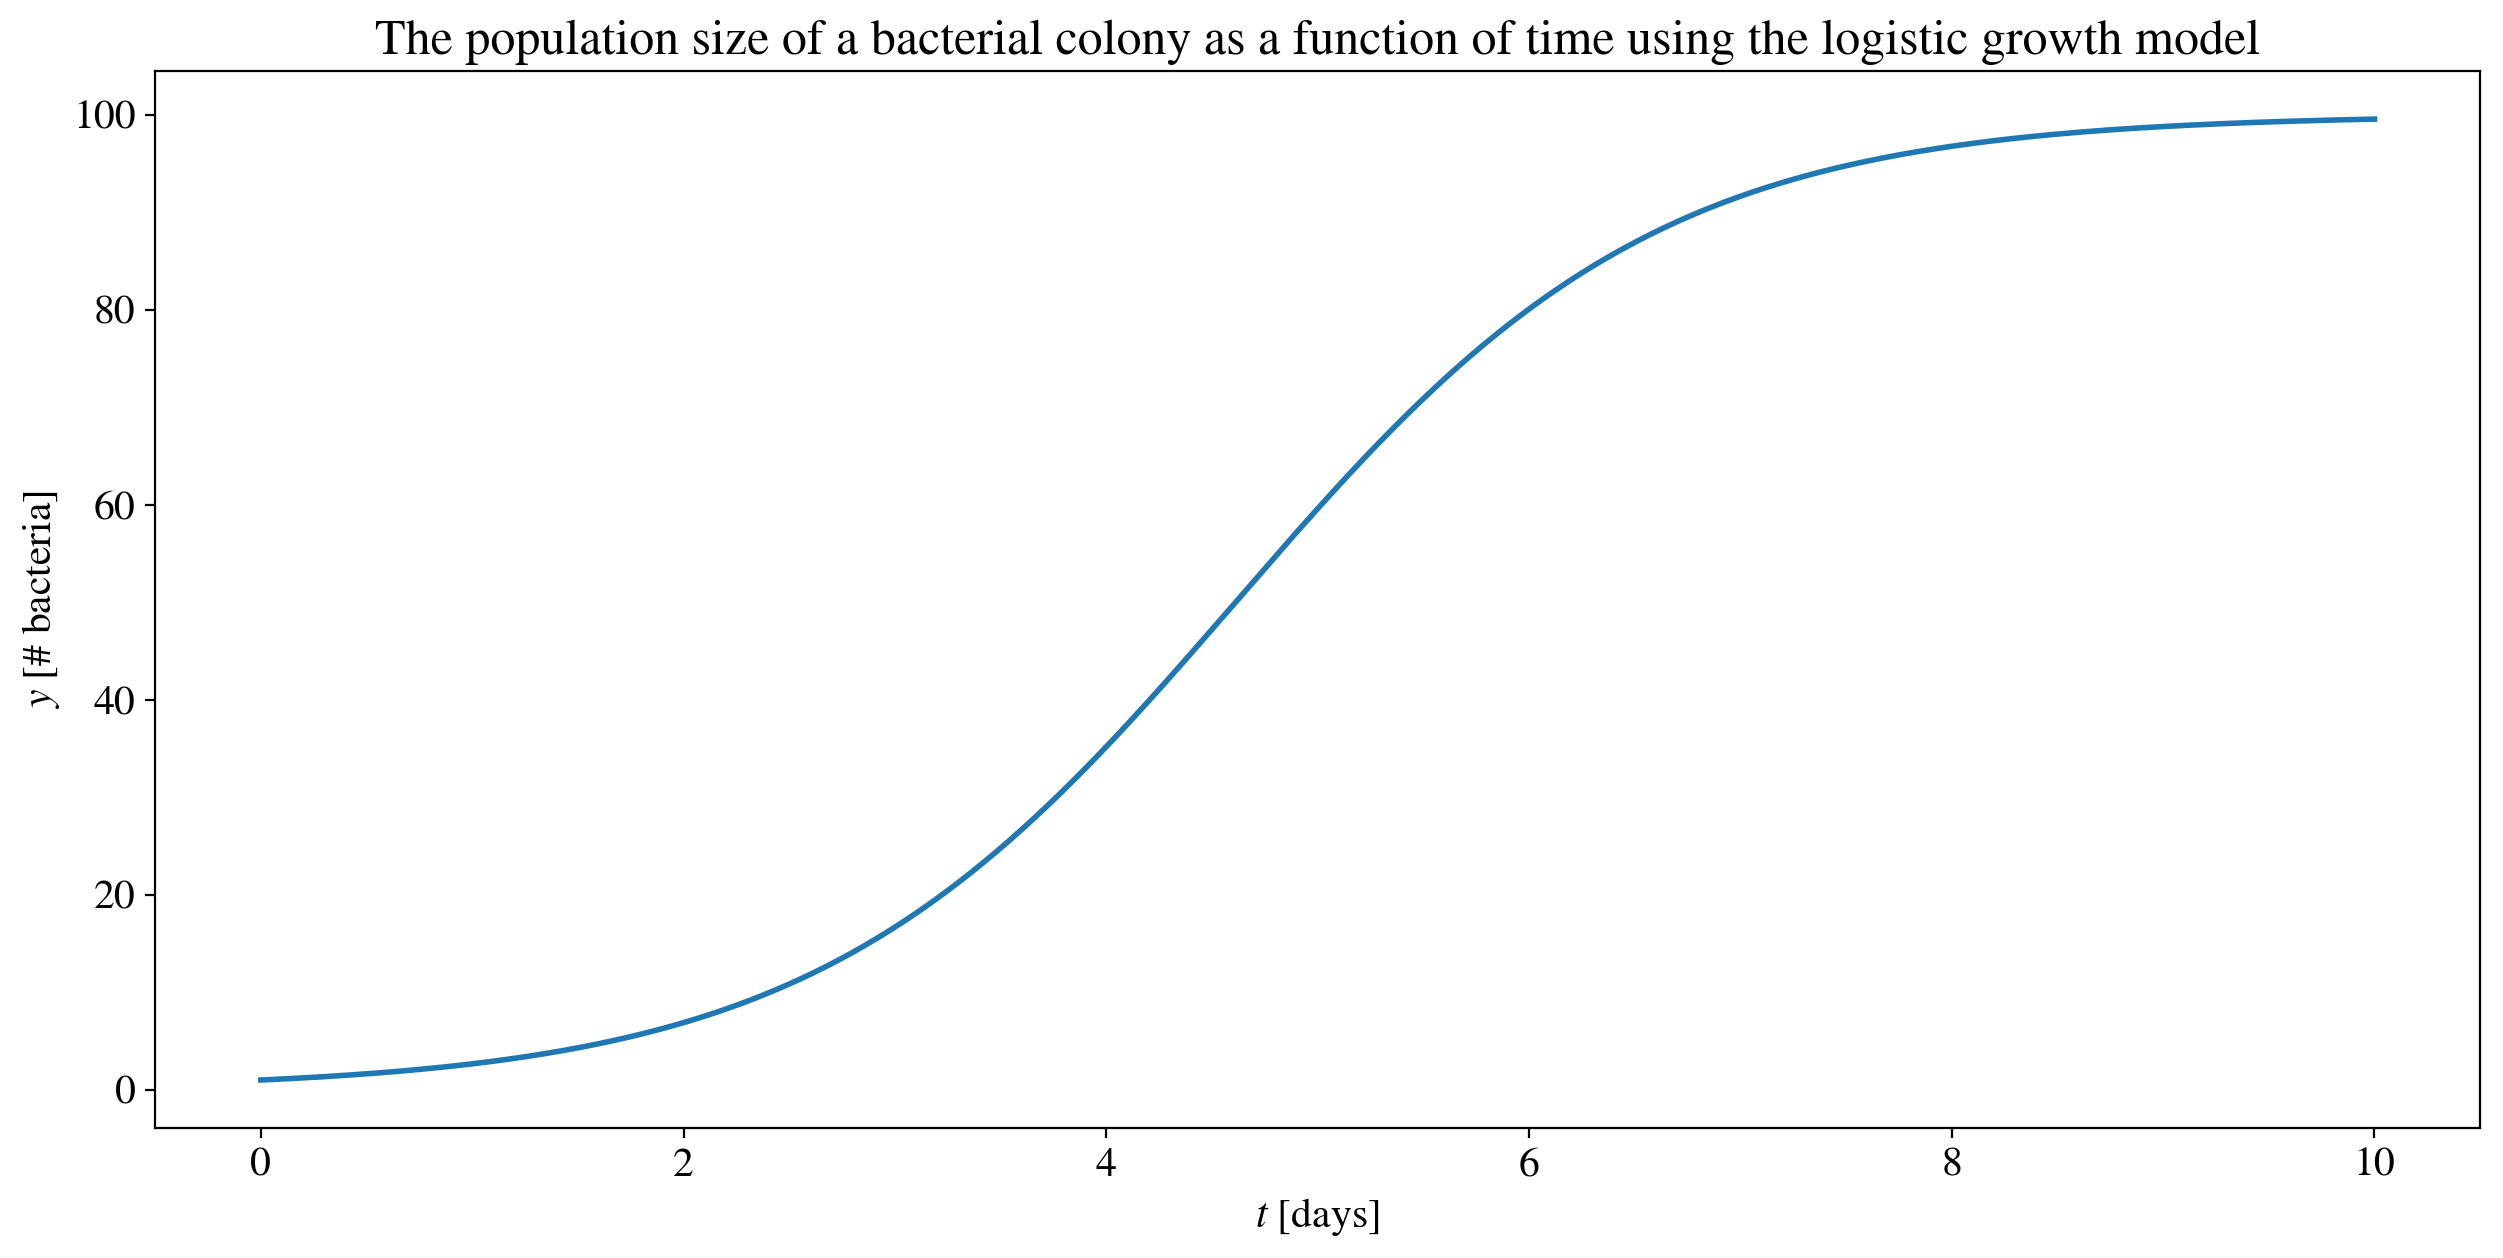

In [0]:
def r(y):
    """Defines the right hand side of our new differential equation. In our case of 
    bacterial growth, h(y) = k*y*(1-y/m). In this case, we set k = 1, and m = 100.
    
    Parameters:
            y: Numerical approximation of y at time t
        Returns:
            growth_rate: The current growth rate for a population with population = y
    """
    k = 1
    m = 100
    growth_rate = k * y * (1 - y / m)
    return growth_rate


# Input parameters

y_0 = 1 # Initial population size
h = 0.01 # Step size
t_0 = 0 # We define the time at our initial observation as 0
t_N = 10 # 10 days after our initial observation of a single bacteria


# Calculating results from Euler and plotting them
y_list, t_list = full_Euler(h, r, y_0, t_0, t_N)
plt.plot(t_list, y_list)


# Making the plot look nice
plt.title("The population size of a bacterial colony as a function of time using the logistic growth model")
plt.xlabel(r'$t$ [days]')
plt.ylabel(r'$y$ [# bacteria]')
plt.show()

This plot illustrates perfectly the essence of Euler's method, and numerical solutions of ODEs in general. Even though we do not have an analytical solution to validate our results against, we can still extract important information from our numerical results and validate the results through physical arguments. The constant $m$ in \eqref{logistic} is called the carrying capacity, the name manifests itself in our plot, as we observe that the population increases exponentially the first five days, but then it seems to converge towards 100 bacteria after 8 days. Physically, a possible explanation could be that our system only has the resources to maintain a population of 100 bacteria, and that additional bacteria would die.

If you are more interested how one can validate numerical results through physical arguments, we have already written two other notebooks that use similar arguments. Namely, simulating a *[charge particle in a uniform magnetic field](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/uniform_magnetic_field_final.ipynb)* , and *[a simple pendulum](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/simple_pendulum.ipynb)*. In physics, energy conservation is frequently used as such an argument.

## Conclusion
Even though Euler's method is very simple to implement, it is still a powerful tool for solving ODEs. In this notebook we have used Euler's method to solve the differential equation governing population growth in a bacterial colony, but the implementation can also be used to solve any ODE with no explicit time dependence. However, as we already have alluded to, the reader should be familiar with the various pitfalls and limitations of Euler's method. Check out our more thorough and complete notebook on *[Euler's method](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/eulers_method.ipynb)* if you are curious to learn more!